# Notes on Chapter 8 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

Generate a simple dataset from a bivariate Gaussian:

In [2]:
np.random.seed(52)
theta = np.random.uniform(0, np.pi)
U = np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])
eigenvals = np.random.uniform(0,4,size=2)
cov = np.einsum('ik,k,jk->ij', U, eigenvals**2, U)
N = 1000
X = np.random.multivariate_normal([0,0], cov, size=N)

(-1.5, 1.5)

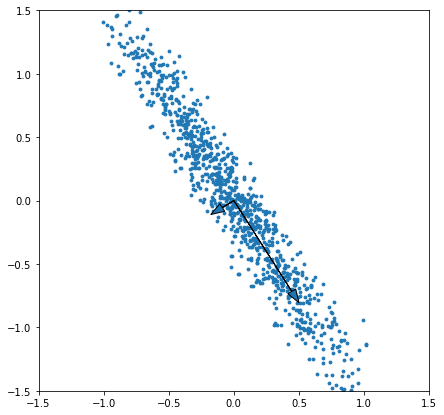

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], s=8)
plt.arrow(0, 0, eigenvals[0]*U[0,0], eigenvals[0]*U[1,0], head_width=0.07)
plt.arrow(0, 0, eigenvals[1]*U[0,1], eigenvals[1]*U[1,1], head_width=0.07)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

Perform PCA using SVD:

In [4]:
u,s,vh = np.linalg.svd(X.transpose())

(-2.0, 2.0)

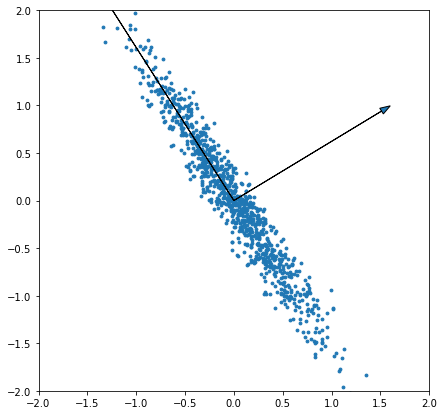

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], s=8)
#plt.plot([0, vh[0,0]], [0, vh[0,1]])
esteigen = np
plt.arrow(0, 0, u[0,0]*np.sqrt(s[0]), u[0,1]*np.sqrt(s[0]), head_width=0.07)
plt.arrow(0, 0, u[1,0]*np.sqrt(s[1]), u[1,1]*np.sqrt(s[1]), head_width=0.07)
plt.xlim(-2,2)
plt.ylim(-2,2)

Plot the principle components

(-0.25, 0.25)

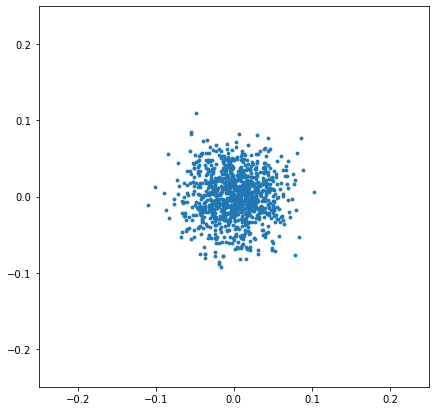

In [6]:
pc = np.einsum('ij,jk,k->ik', X, u, s**-1)
plt.figure(figsize=(7,7))
plt.scatter(pc[:,0], pc[:,1], s=8)
plt.xlim(-0.25,0.25)
plt.ylim(-0.25,0.25)

Just unrotate to align axes with priniple components (trival to project from here...)

(-2.0, 2.0)

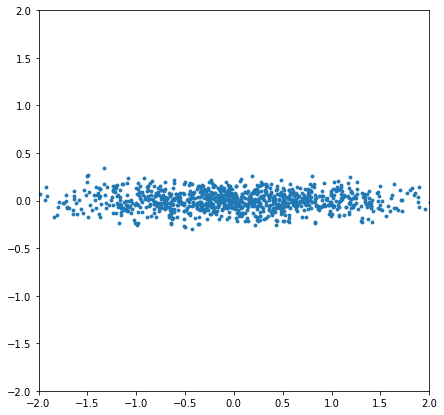

In [7]:
pc = np.einsum('ij,jk->ik', X, u)
plt.figure(figsize=(7,7))
plt.scatter(pc[:,0], pc[:,1], s=8)
plt.xlim(-2,2)
plt.ylim(-2,2)

Do the same thing with sklearn

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

(-2.0, 2.0)

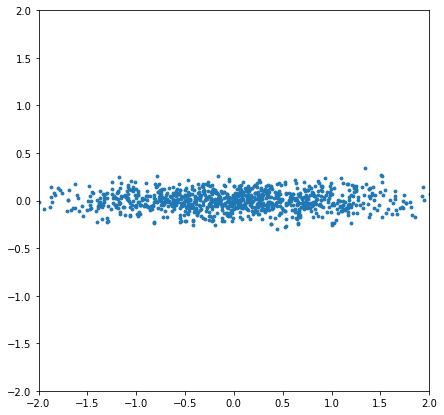

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(X_pca[:,0], X_pca[:,1], s=8)
plt.xlim(-2,2)
plt.ylim(-2,2)

In [10]:
pca.explained_variance_

array([0.73386552, 0.0100676 ])

In [11]:
eigenvals**2

array([0.01091438, 0.7107882 ])

Load the MNIST dataset

In [12]:
mnist = load_digits()

In [13]:
mnist.images.shape

(1797, 8, 8)

In [14]:
mnist.data.shape

(1797, 64)

In [15]:
def plot_digits(data, nrows = 8, ncols = 8):
    fig, axs = plt.subplots(nrows, ncols)
    for i in range(nrows):
        for j in range(ncols):
            image = data[i + j*nrows].reshape((8,-1))
            axs[i,j].imshow(image, cmap='binary') 

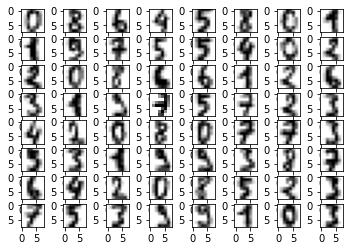

In [16]:
plot_digits(mnist.data)

PCA can be used to compress the MNIST data by a factor of 6 or so:

In [17]:
pca = PCA(n_components=0.75)
mnist_pca = pca.fit_transform(mnist.data)

In [18]:
mnist_pca.shape

(1797, 11)

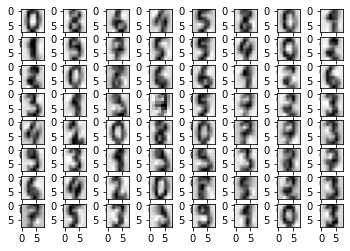

In [19]:
plot_digits(pca.inverse_transform(mnist_pca))

The principle components for this example do not map cleanly onto the digits, however:

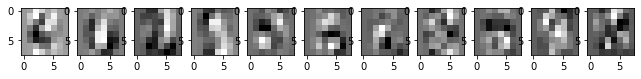

In [20]:
nrows = 1
ncols = pca.n_components_
fig, axs = plt.subplots(nrows, ncols, squeeze=False, figsize=(ncols, nrows))
for i in range(nrows):
    for j in range(ncols):
        image = pca.components_[i + j*nrows].reshape((8,-1))
        axs[i,j].imshow(image, cmap='binary') 